ECGR 4105 Homework 5 | Khang Vu | 801059139 | November 22, 2022

In [1]:
import imageio
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 

In [2]:
pip install ptflops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ptflops: filename=ptflops-0.6.9-py3-none-any.whl size=11712 sha256=c3584f7359b7af28281b107ad6f740826898d1031d3237957e3200430281e2d8
  Stored in directory: /root/.cache/pip/wheels/c8/71/2f/92426c1ef33fb2e275b533878d8378f91c7f26846d9669019c
Successfully built ptflops


In [3]:
from ptflops import get_model_complexity_info

Problem 1 (20 pts):

In our temperature prediction example, let’s change our model to a non-linear system. Consider the following description for our model:

w2 * t_u ** 2 + w1 * t_u + b.

1.a Modify the training loop properly to accommodate this redefinition. 

1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [4]:
#Temperature Prediction from Example
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

In [5]:
#Loss Calculation Variables
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [6]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [8]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [9]:
def dmodel_dw1(t_u, w1, w2, b):
    return t_u

In [10]:
def dmodel_dw2(t_u, w1, w2, b):
    return t_u**2

In [11]:
def dmodel_db(t_u, w1, w2, b):
    return 1.0

In [12]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1 , w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

In [13]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)
        params = params - learning_rate * grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [14]:
#Normalization
t_un = 0.1 * t_u

In [15]:
#Training with Learning Rate = 0.1
params = training_loop(
n_epochs = 5000,
learning_rate = 0.1,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [16]:
#Training with Learning Rate = 0.01
params = training_loop(
n_epochs = 5000,
learning_rate = 0.01,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [17]:
#Training with Learning Rate = 0.001
params = training_loop(
n_epochs = 5000,
learning_rate = 0.001,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [18]:
#Training with Learning Rate = 0.0001
params = training_loop(
n_epochs = 5000,
learning_rate = 0.0001,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


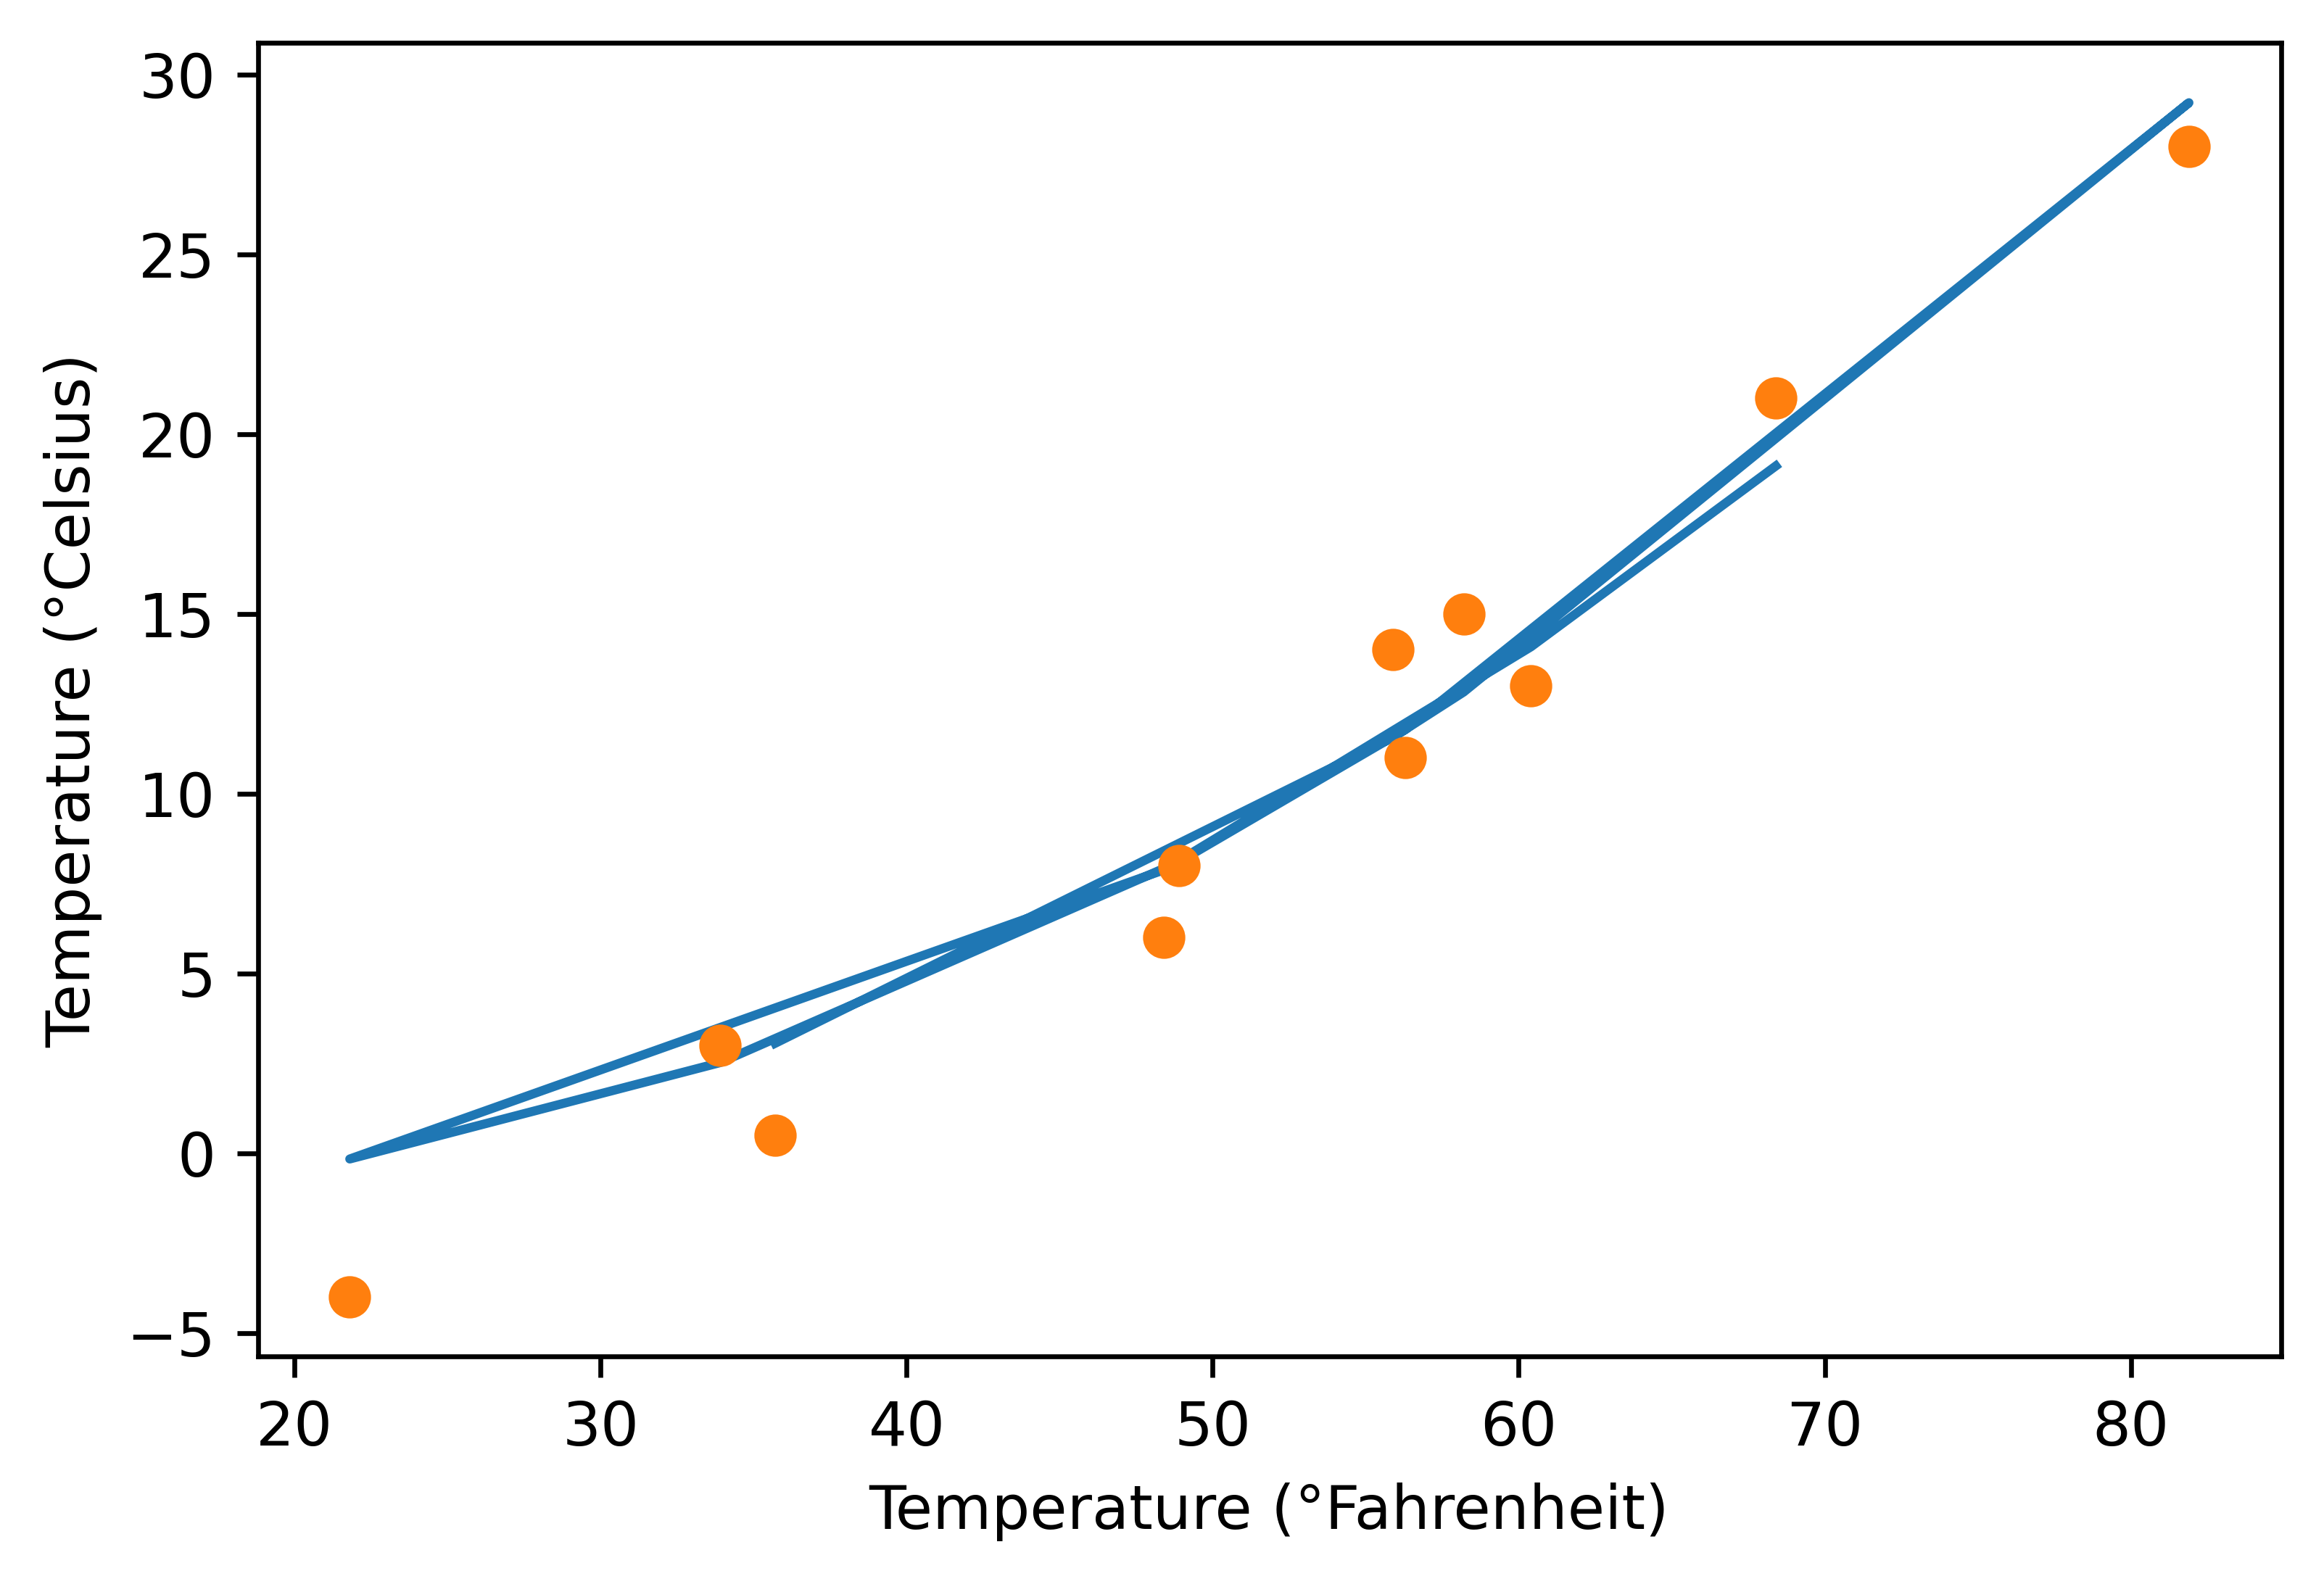

In [19]:
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

Problem 2 (30 pts):

2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model, based on the above input variables. In this case, you will have six parameters:

U=W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per each training. Pick the best linear model.

In [20]:
file_path = '/content/drive/MyDrive/Machine Learning/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
housing = df[varlist] 
housing.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [22]:
#Price Parameters
t_area = torch.tensor(housing['area'])
t_bedrooms = torch.tensor(housing['bedrooms'])
t_bathrooms = torch.tensor(housing['bathrooms'])
t_stories = torch.tensor(housing['stories'])
t_parking = torch.tensor(housing['parking'])
t_price = torch.tensor(housing['price'])

#Normalized Parameters
tn_area = t_area / max(housing['area'])
tn_bedrooms = t_bedrooms / max(housing['bedrooms'])
tn_bathrooms = t_bathrooms / max(housing['bathrooms'])
tn_stories = t_stories / max(housing['stories'])
tn_parking = t_parking / max(housing['parking'])

In [23]:
#New Equation
def model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w1, w2, w3, w4, w5, b):
    return w5*t_parking + w4*t_stories + w3*t_bathrooms + w2*t_bedrooms + w1*t_area + b

In [24]:
#Loss Calculation
def loss_fn(t_p, t_price):
    squared_diffs = (t_p - t_price)**2
    return squared_diffs.mean()

In [25]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)
params.grad is None

True

In [26]:
loss = loss_fn(model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params), t_price)
loss.backward()
params.grad

tensor([-5.3383e+10, -2.9247e+07, -1.3220e+07, -1.8557e+07, -7.8404e+06,
        -9.5231e+06])

In [27]:
if params.grad is not None:
    params.grad.zero_()

In [28]:
def training_loop(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, t_price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params) 
        loss = loss_fn(t_p, t_price)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [29]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-1, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), 
    t_area = tn_area,
    t_bedrooms = tn_bedrooms,
    t_bathrooms = tn_bathrooms,
    t_stories = tn_stories,
    t_parking = tn_parking,
    t_price = t_price)

Epoch 500, Loss 1562038501376.000000
Epoch 1000, Loss 1533011427328.000000
Epoch 1500, Loss 1531161870336.000000
Epoch 2000, Loss 1531023589376.000000
Epoch 2500, Loss 1531010482176.000000
Epoch 3000, Loss 1531008778240.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


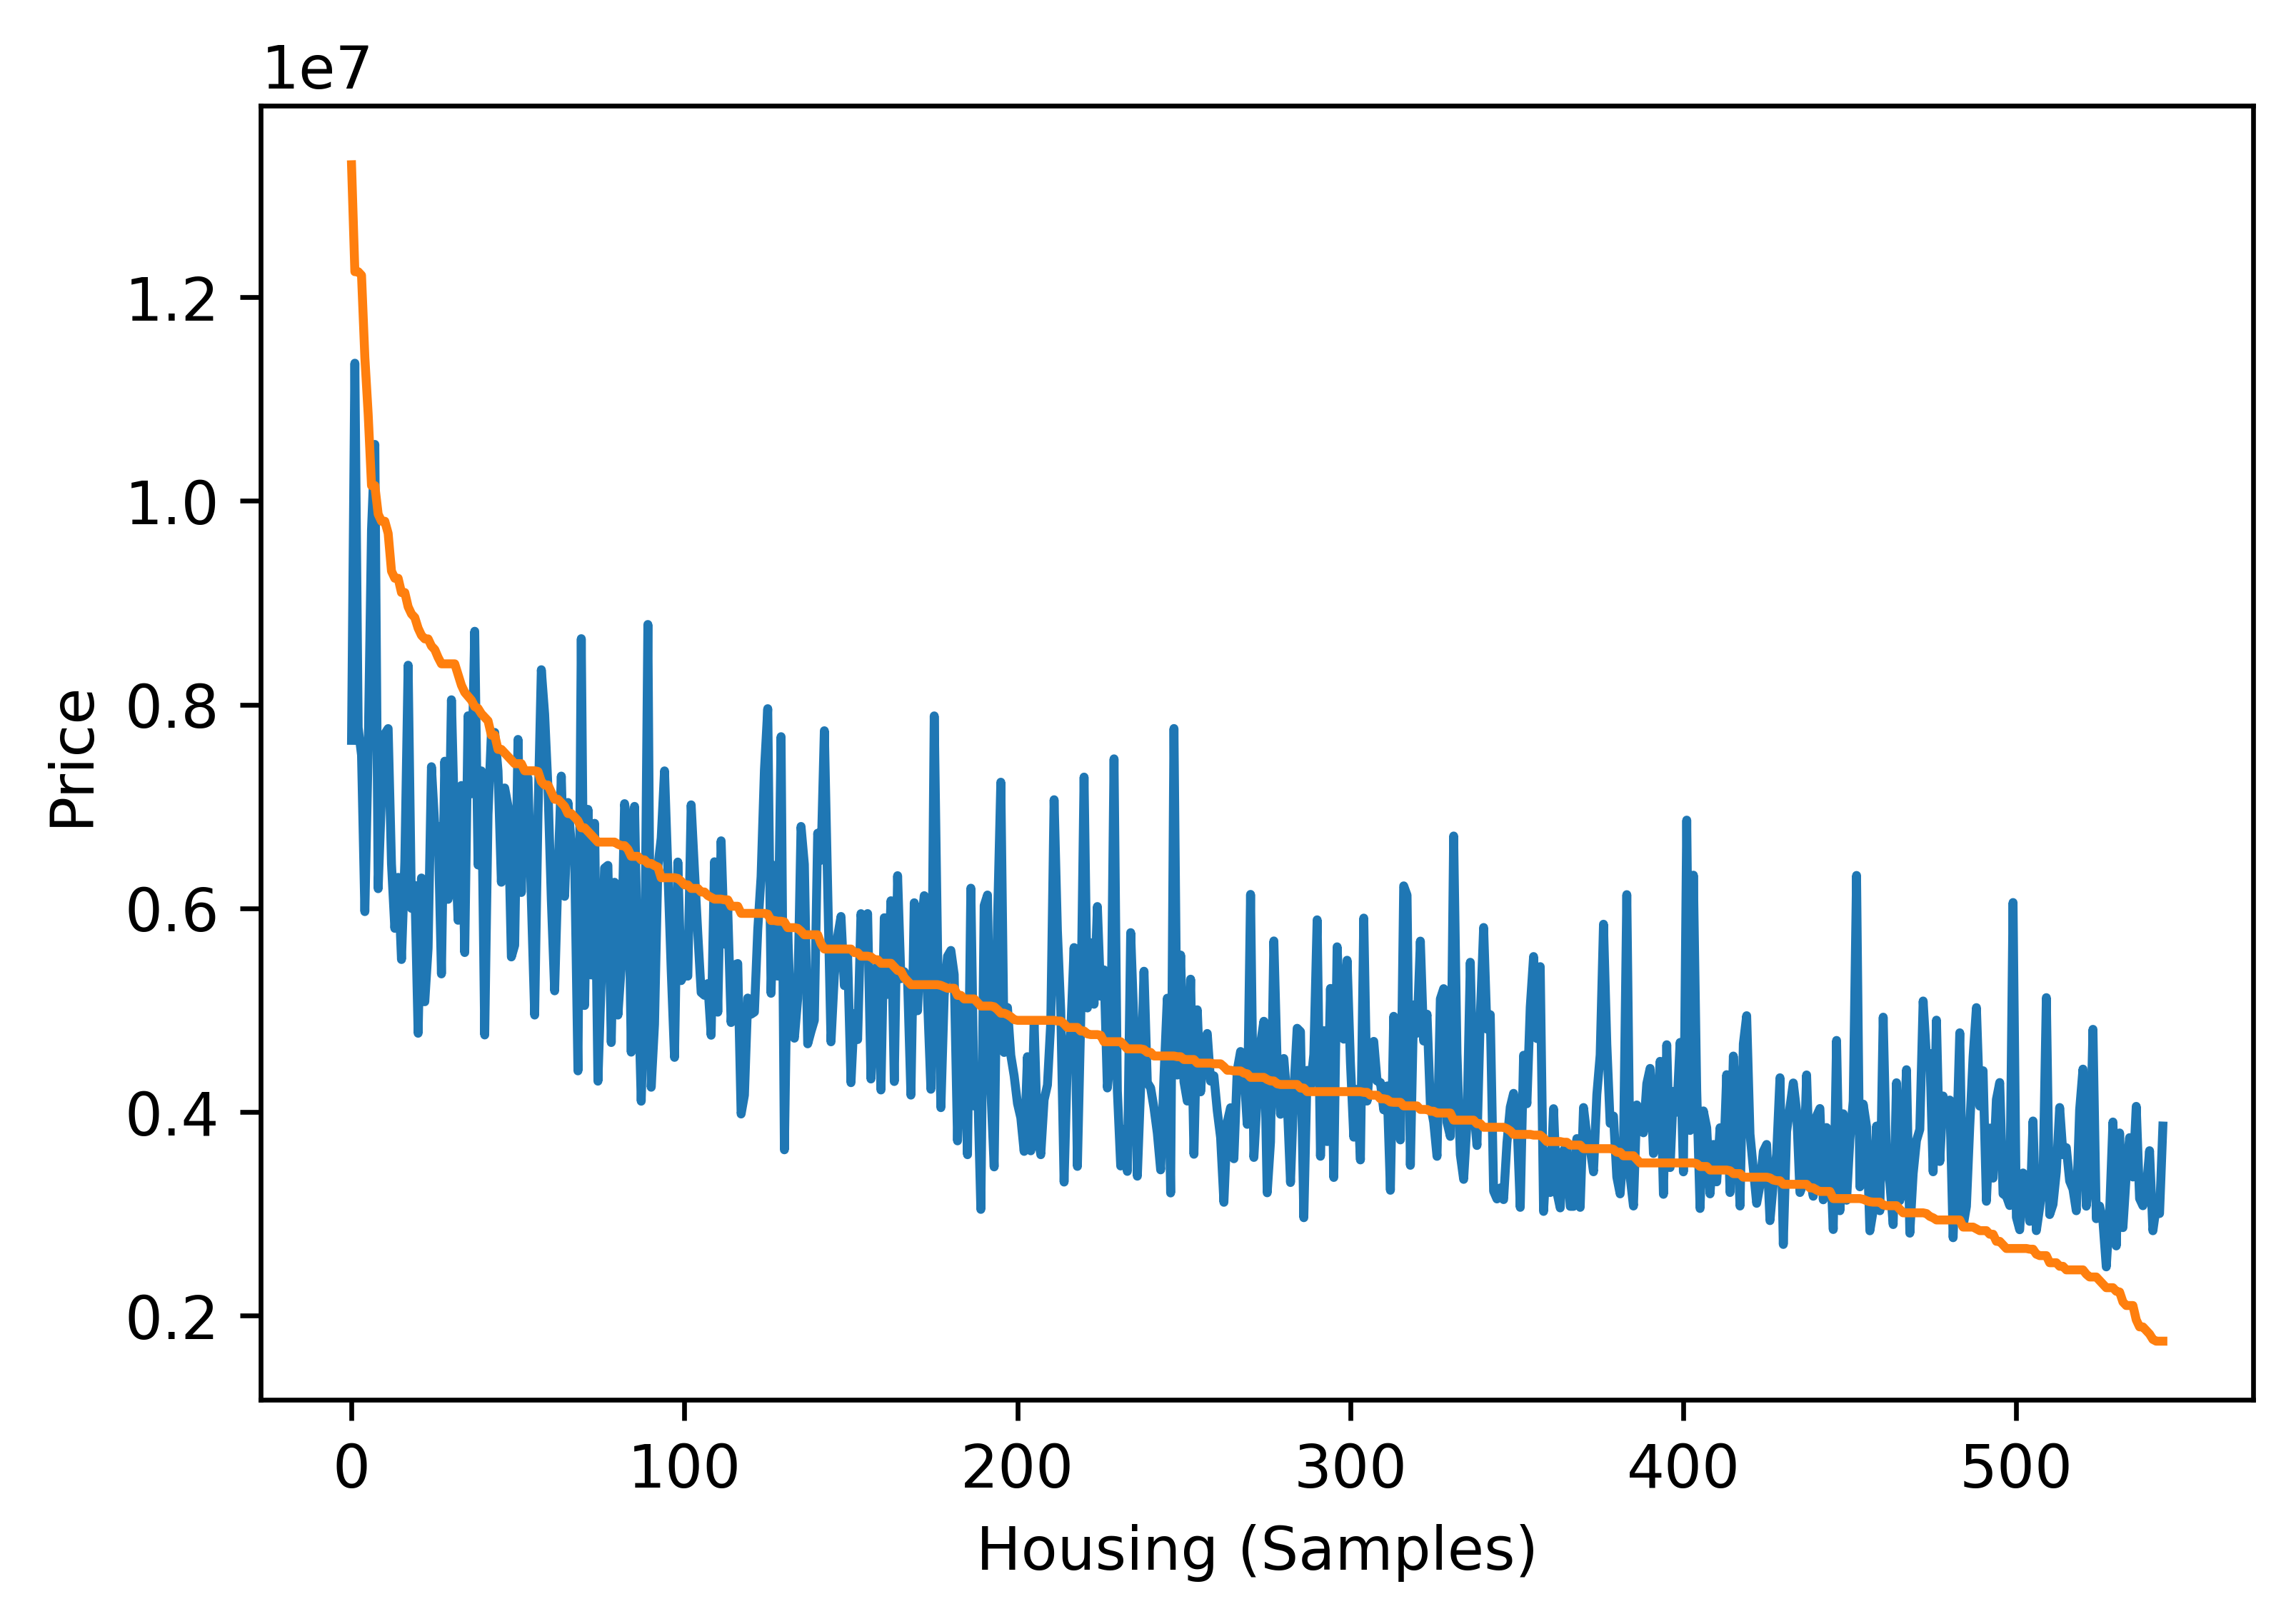

In [30]:
%matplotlib inline
t_p = model(tn_area, tn_bedrooms, tn_bathrooms, tn_stories, tn_parking, *params)
fig = plt.figure(dpi=600)
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel("Housing (Samples)")
plt.ylabel("Price")
plt.plot(t_p.detach().numpy())
plt.plot(t_price)

Problem 3 (50 pts):

3.a Build a fully connected neural network for the housing dataset you did in previous problem. For training and validation use 80% (training) and 20% (validation) split. For this part, only use one hidden layer with 8 nodes. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. (15pts)

3.b Extend your network with two more additional hidden layers, like the example we did in lecture. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem1. a. Do you see any over-fitting? Make sure to submit your code by providing the GitHub URL of your course repository for this course. (25pts)

In [31]:
file_path = '/content/drive/MyDrive/Machine Learning/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
housing = df[varlist] 
housing.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [33]:
#Parameters
t_area = torch.tensor(housing['area']) 
t_bedrooms = torch.tensor(housing['bedrooms'])
t_bathrooms = torch.tensor(housing['bathrooms'])
t_stories = torch.tensor(housing['stories'])
t_parking = torch.tensor(housing['parking'])
t_price = torch.tensor(housing['price'])

#Normalized Parameters
tn_area = t_area / max(housing['area'])
tn_bedrooms = t_bedrooms / max(housing['bedrooms'])
tn_bathrooms = t_bathrooms / max(housing['bathrooms'])
tn_stories = t_stories / max(housing['stories'])
tn_parking = t_parking / max(housing['parking'])
tn_price = t_price / max(housing['price'])

In [34]:
#80/20 Split
mask = np.random.rand(len(tn_area)) <= 0.8

#Area
train_t_area = tn_area[mask]
val_t_area = tn_area[~mask]

#Bedrooms
train_t_bedrooms = tn_bedrooms[mask]
val_t_bedrooms = tn_bedrooms[~mask]

#Bathrooms
train_t_bathrooms = tn_bathrooms[mask]
val_t_bathrooms = tn_bathrooms[~mask]

#Stories
train_t_stories = tn_stories[mask]
val_t_stories = tn_stories[~mask]

#Parking
train_t_parking = tn_parking[mask]
val_t_parking = tn_parking[~mask]

#Price
train_t_price = tn_price[mask]
val_t_price = tn_price[~mask]

In [35]:
#Create tensors using normalized features
train_features = [train_t_area, train_t_bedrooms, train_t_bathrooms, train_t_stories, train_t_parking]
train_features = torch.stack(train_features)
train_features = np.transpose(train_features)

val_features = [val_t_area, val_t_bedrooms, val_t_bathrooms, val_t_stories, val_t_parking]
val_features = torch.stack(val_features)
val_features = np.transpose(val_features)

In [36]:
train_features

tensor([[0.4580, 0.6667, 0.5000, 0.7500, 0.6667],
        [0.5531, 0.6667, 1.0000, 1.0000, 1.0000],
        [0.6148, 0.5000, 0.5000, 0.5000, 0.6667],
        ...,
        [0.1481, 0.5000, 0.2500, 0.2500, 0.0000],
        [0.2235, 0.3333, 0.2500, 0.2500, 0.0000],
        [0.1796, 0.5000, 0.2500, 0.2500, 0.0000]])

In [37]:
val_features

tensor([[0.5000, 0.6667, 0.2500, 0.5000, 0.6667],
        [0.3549, 0.5000, 0.5000, 1.0000, 0.3333],
        [0.3704, 0.6667, 0.7500, 0.5000, 0.6667],
        [0.3963, 0.5000, 0.5000, 0.5000, 0.3333],
        [0.2815, 0.5000, 0.5000, 0.5000, 0.3333],
        [0.4037, 0.6667, 0.5000, 0.5000, 0.6667],
        [0.5478, 0.5000, 0.2500, 0.2500, 0.3333],
        [0.4907, 0.8333, 0.5000, 0.5000, 0.6667],
        [0.4614, 0.5000, 0.5000, 1.0000, 0.6667],
        [0.3012, 0.6667, 0.5000, 0.5000, 0.3333],
        [0.3679, 0.5000, 0.7500, 0.5000, 0.3333],
        [0.4222, 0.8333, 0.2500, 0.5000, 0.3333],
        [0.4043, 0.5000, 0.2500, 0.5000, 0.0000],
        [0.3179, 0.5000, 0.5000, 1.0000, 0.6667],
        [0.7062, 0.6667, 0.2500, 0.5000, 0.3333],
        [0.5481, 0.3333, 0.2500, 0.2500, 0.3333],
        [0.5481, 0.5000, 0.5000, 0.5000, 0.3333],
        [0.2630, 0.6667, 0.5000, 0.5000, 0.0000],
        [0.4012, 0.5000, 0.5000, 0.7500, 0.0000],
        [0.2321, 0.5000, 0.2500, 0.5000, 0.6667],


In [38]:
#Sequential Model
import torch.nn as nn
import torch.optim as optim
seq_model = nn.Sequential(
                nn.Linear(5,8), #First Layer
                nn.Tanh(), 
                nn.Linear(8,16), #Hidden Layer 
                nn.Tanh(),
                nn.Linear(16,1)) #Last Layer
seq_model

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=16, bias=True)
  (3): Tanh()
  (4): Linear(in_features=16, out_features=1, bias=True)
)

In [39]:
#Optimizer
optmiz = optim.SGD(seq_model.parameters(), lr = 1e-3)

In [40]:
#Training Loop Function 
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
      
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():0.4f},"f" Validation loss {loss_val.item():.4f}")

In [41]:
#Training Loop
training_loop(
    n_epochs = 200,
    optimizer = optmiz,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_features,
    t_u_val = val_features,
    t_c_train = train_t_price,
    t_c_val = val_t_price)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([434])) that is different to the input size (torch.Size([434, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([111])) that is different to the input size (torch.Size([111, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 0.0275, Validation loss 0.0282
Epoch 100, Training loss 0.0220, Validation loss 0.0231
Epoch 200, Training loss 0.0203, Validation loss 0.0216


In [42]:
with torch.cuda.device(0):
  net = seq_model
  macs, params = get_model_complexity_info(net, (1, 5), as_strings=True, print_per_layer_stat=True, 
verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  209, 100.000% Params, 209.0 Mac, 100.000% MACs, 
  (0): Linear(48, 22.967% Params, 48.0 Mac, 22.967% MACs, in_features=5, out_features=8, bias=True)
  (1): Tanh(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (2): Linear(144, 68.900% Params, 144.0 Mac, 68.900% MACs, in_features=8, out_features=16, bias=True)
  (3): Tanh(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (4): Linear(17, 8.134% Params, 17.0 Mac, 8.134% MACs, in_features=16, out_features=1, bias=True)
)
Computational complexity:       209.0 Mac
Number of parameters:           209     


In [43]:
#Sequential Model (2 additional hidden layers)
seq_model2 = nn.Sequential(
                nn.Linear(5,8), #First Layer
                nn.Tanh(),  
                nn.Linear(8,16), #Hidden Layer 
                nn.Tanh(),
                nn.Linear(16, 32), #Hidden Layer 
                nn.Tanh(),
                nn.Linear(32,64), #Hidden Layer 
                nn.Tanh(),
                nn.Linear(64,1)) #Last Layer
seq_model2

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=16, bias=True)
  (3): Tanh()
  (4): Linear(in_features=16, out_features=32, bias=True)
  (5): Tanh()
  (6): Linear(in_features=32, out_features=64, bias=True)
  (7): Tanh()
  (8): Linear(in_features=64, out_features=1, bias=True)
)

In [44]:
#Optimizer
optmiz2 = optim.SGD(seq_model2.parameters(), lr = 1e-3)

In [45]:
#Training Loop Function
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():0.4f},"f" Validation loss {loss_val.item():.4f}")

In [46]:
#Training Loop
training_loop(
    n_epochs = 200,
    optimizer = optmiz2,
    model = seq_model2,
    loss_fn = nn.MSELoss(),
    t_u_train = train_features,
    t_u_val = val_features,
    t_c_train = train_t_price,
    t_c_val = val_t_price)

Epoch 1, Training loss 0.1169, Validation loss 0.1172
Epoch 100, Training loss 0.0433, Validation loss 0.0441
Epoch 200, Training loss 0.0253, Validation loss 0.0264


In [47]:
with torch.cuda.device(0):
  net = seq_model2
  macs, params = get_model_complexity_info(net, (1, 5), as_strings=True, print_per_layer_stat=True, 
verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  2.91 k, 100.000% Params, 2.91 KMac, 100.000% MACs, 
  (0): Linear(48, 1.648% Params, 48.0 Mac, 1.648% MACs, in_features=5, out_features=8, bias=True)
  (1): Tanh(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (2): Linear(144, 4.943% Params, 144.0 Mac, 4.943% MACs, in_features=8, out_features=16, bias=True)
  (3): Tanh(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (4): Linear(544, 18.675% Params, 544.0 Mac, 18.675% MACs, in_features=16, out_features=32, bias=True)
  (5): Tanh(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (6): Linear(2.11 k, 72.503% Params, 2.11 KMac, 72.503% MACs, in_features=32, out_features=64, bias=True)
  (7): Tanh(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (8): Linear(65, 2.231% Params, 65.0 Mac, 2.231% MACs, in_features=64, out_features=1, bias=True)
)
Computational complexity:       2.91 KMac
Number of parameters:           2.91 k  
